## online shoppers intention Dataset preprocessing

### 	Number of classes and their labels 
#### 17 class [	Administrative , Administrative_Duration , Informational , Informational_Duration , ProductRelated,  ProductRelated_Duration , 	BounceRates , ExitRates	, PageValues	,    SpecialDay  , 	Month	,  OperatingSystems	, Browser	,  Region  ,   TrafficType , 	VisitorType , 	Weekend	]

#### Label :- Revenue

### Dataset Samples Numbers 12330 sample



In [1]:
#Import the important libraries
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
dataset=pd.read_csv('D:/Faaclty/level 3/selcted-1/ANN Algorithm(numerical)/Dataset/online_shoppers_intention.csv')
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


### Replace any True value with 1 and any false value with 0


In [3]:
dataset['Revenue'].unique()

array([False,  True])

In [4]:
dataset['Weekend'].unique()

array([False,  True])

In [5]:
dataset['Revenue'] = dataset['Revenue'].replace(False, 0)
dataset['Revenue'] = dataset['Revenue'].replace(True, 1)

dataset['Weekend'] = dataset['Weekend'].replace(False, 0)
dataset['Weekend'] = dataset['Weekend'].replace(True, 1)

In [6]:
dataset['Revenue'].unique()

array([0, 1], dtype=int64)

In [7]:
dataset['Weekend'].unique()

array([0, 1], dtype=int64)

In [8]:
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,1,0


### Remove any columns do not related with machine learning model target

In [9]:
dataset.drop(['OperatingSystems'], axis = 1, inplace = True) 
dataset.drop(['Browser','Region','TrafficType','Month'], axis = 1, inplace = True) 
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Returning_Visitor,1,0


### Check null value

In [10]:
dataset.isna().any()

Administrative             False
Administrative_Duration    False
Informational              False
Informational_Duration     False
ProductRelated             False
ProductRelated_Duration    False
BounceRates                False
ExitRates                  False
PageValues                 False
SpecialDay                 False
VisitorType                False
Weekend                    False
Revenue                    False
dtype: bool

### Check Multicollinearity

In [11]:
dataset.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Weekend,Revenue
Administrative,1.00,0.60,0.38,0.26,0.43,0.37,-0.22,-0.32,0.10,-0.09,0.03,0.14
Administrative_Duration,0.60,1.00,0.30,0.24,0.29,0.36,-0.14,-0.21,0.07,-0.07,0.01,0.09
Informational,0.38,0.30,1.00,0.62,0.37,0.39,-0.12,-0.16,0.05,-0.05,0.04,0.10
Informational_Duration,0.26,0.24,0.62,1.00,0.28,0.35,-0.07,-0.11,0.03,-0.03,0.02,0.07
ProductRelated,0.43,0.29,0.37,0.28,1.00,0.86,-0.20,-0.29,0.06,-0.02,0.02,0.16
ProductRelated_Duration,0.37,0.36,0.39,0.35,0.86,1.00,-0.18,-0.25,0.05,-0.04,0.01,0.15
BounceRates,-0.22,-0.14,-0.12,-0.07,-0.20,-0.18,1.00,0.91,-0.12,0.07,-0.05,-0.15
ExitRates,-0.32,-0.21,-0.16,-0.11,-0.29,-0.25,0.91,1.00,-0.17,0.10,-0.06,-0.21
PageValues,0.10,0.07,0.05,0.03,0.06,0.05,-0.12,-0.17,1.00,-0.06,0.01,0.49
SpecialDay,-0.09,-0.07,-0.05,-0.03,-0.02,-0.04,0.07,0.10,-0.06,1.00,-0.02,-0.08


### Remove 'ProductRelated_Duration' & 'ExitRates' to solve Multicollinearity

In [12]:
dataset.drop(['ProductRelated_Duration','ExitRates'], axis = 1, inplace = True)

In [13]:
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.20,0.0,0.0,Returning_Visitor,0,0
1,0,0.0,0,0.0,2,0.00,0.0,0.0,Returning_Visitor,0,0
2,0,0.0,0,0.0,1,0.20,0.0,0.0,Returning_Visitor,0,0
3,0,0.0,0,0.0,2,0.05,0.0,0.0,Returning_Visitor,0,0
4,0,0.0,0,0.0,10,0.02,0.0,0.0,Returning_Visitor,1,0


### Handling Categorical Variables in 'VisitotType'


In [14]:
dataset = pd.concat([dataset,pd.get_dummies(dataset['VisitorType'],prefix='Visitor')],axis=1)
dataset.drop(['VisitorType'], axis = 1, inplace = True)
dataset.drop(['Visitor_Other'], axis = 1, inplace = True)
dataset = dataset.reindex(columns = ['Administrative','Administrative_Duration','Informational','Informational_Duration','ProductRelated','BounceRates','PageValues','SpecialDay','Weekend','Visitor_New_Visitor','Visitor_Returning_Visitor','Revenue'])
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Weekend,Visitor_New_Visitor,Visitor_Returning_Visitor,Revenue
0,0,0.0,0,0.0,1,0.20,0.0,0.0,0,0,1,0
1,0,0.0,0,0.0,2,0.00,0.0,0.0,0,0,1,0
2,0,0.0,0,0.0,1,0.20,0.0,0.0,0,0,1,0
3,0,0.0,0,0.0,2,0.05,0.0,0.0,0,0,1,0
4,0,0.0,0,0.0,10,0.02,0.0,0.0,1,0,1,0


In [15]:
dataset.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Weekend,Visitor_New_Visitor,Visitor_Returning_Visitor,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,0.022191,5.889258,0.061427,0.232603,0.137388,0.855718,0.154745
std,3.321784,176.779107,1.270156,140.749294,44.475503,0.048488,18.568437,0.198917,0.422509,0.344271,0.351390,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,0.003112,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,0.016813,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,0.200000,361.763742,1.000000,1.000000,1.000000,1.000000,1.000000


# Check outliers

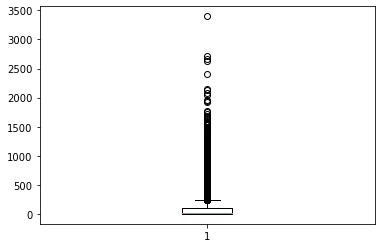

In [16]:
# check outlier in 'Administrative_Duration'
plt.boxplot(dataset["Administrative_Duration"])
plt.show()

In [17]:
# check outlier in 'Administrative_Duration'
dataset["Administrative_Duration"].skew()

5.61571901877419

In [18]:
# Handling outlier in 'Administrative_Duration' using Quantile-based Flooring and Capping

print(dataset['Administrative_Duration'].skew())
Q1=dataset['Administrative_Duration'].quantile(0.25)
Q3=dataset['Administrative_Duration'].quantile(0.75)
IQR=Q3-Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR
ten_percent=dataset['Administrative_Duration'].quantile(0.10)
ninty_percent=dataset['Administrative_Duration'].quantile(0.90)

dataset["Administrative_Duration"] = np.where(dataset["Administrative_Duration"] <Min, ten_percent,dataset['Administrative_Duration'])
dataset["Administrative_Duration"] = np.where(dataset["Administrative_Duration"] >Max, ninty_percent,dataset['Administrative_Duration'])
print(dataset['Administrative_Duration'].skew())

5.61571901877419
1.1983482340140148


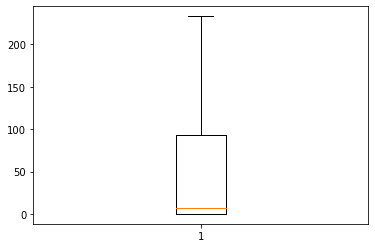

In [19]:
# Check outlier in 'Administrative_Duration' after preprocessing 
plt.boxplot(dataset["Administrative_Duration"])
plt.show()

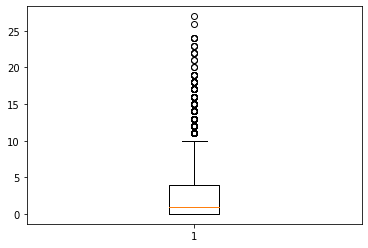

In [20]:
# check outlier in 'Administrative'
plt.boxplot(dataset["Administrative"])
plt.show()

In [21]:
# check outlier in 'Administrative'
dataset['Administrative'].skew()

1.9603572090790138

In [22]:
# Handling outlier in 'Administrative' using Quantile-based Flooring and Capping

print(dataset['Administrative'].skew())
Q1=dataset['Administrative'].quantile(0.25)
Q3=dataset['Administrative'].quantile(0.75)
IQR=Q3-Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR
ten_percent=dataset['Administrative'].quantile(0.10)
ninty_percent=dataset['Administrative'].quantile(0.90)

dataset["Administrative"] = np.where(dataset["Administrative"] <Min, ten_percent,dataset['Administrative'])
dataset["Administrative"] = np.where(dataset["Administrative"] >Max, ninty_percent,dataset['Administrative'])
print(dataset['Administrative'].skew())

1.9603572090790138
1.1743053067604523


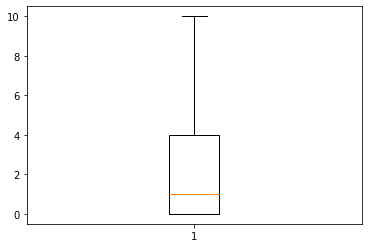

In [23]:
# Check outlier in 'Administrative' after preprocessing 

plt.boxplot(dataset["Administrative"])
plt.show()

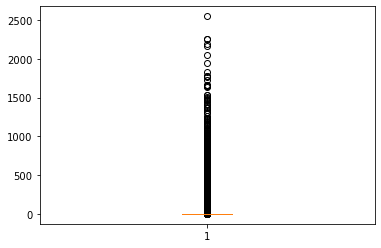

In [24]:
# check outlier in 'Informational_Duration'

plt.boxplot(dataset["Informational_Duration"])
plt.show()

In [25]:
# check outlier in 'Informational_Duration'
dataset['Informational_Duration'].skew()

7.579184715734214

In [26]:
# Handling outlier in 'Informational_Duration' using Quantile-based Flooring and Capping
print(dataset['Informational_Duration'].skew())
Q1=dataset['Informational_Duration'].quantile(0.25)
Q3=dataset['Informational_Duration'].quantile(0.75)
IQR=Q3-Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR
ten_percent=dataset['Informational_Duration'].quantile(0.10)
ninty_percent=dataset['Informational_Duration'].quantile(0.90)

dataset["Informational_Duration"] = np.where(dataset["Informational_Duration"] <Min, ten_percent,dataset['Informational_Duration'])
dataset["Informational_Duration"] = np.where(dataset["Informational_Duration"] >Max, ninty_percent,dataset['Informational_Duration'])
print(dataset['Informational_Duration'].skew())


7.579184715734214
1.5393872365668535


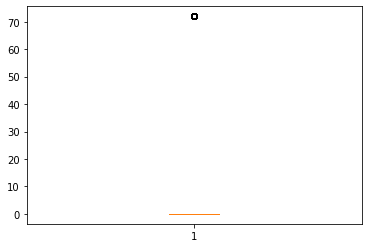

In [27]:
# check outlier in 'Informational_Duration' after preprocessing 
plt.boxplot(dataset["Informational_Duration"])
plt.show()

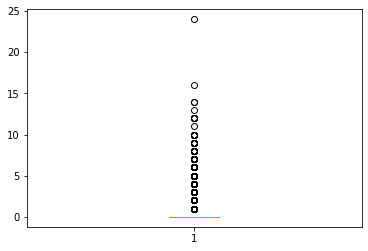

In [28]:
# check outlier in 'Informational'
plt.boxplot(dataset["Informational"])
plt.show()

In [29]:
# check outlier in 'Informational'
dataset["Informational"].skew()

4.036463759943139

In [30]:
# Handling outlier in 'Informational' using Quantile-based Flooring and Capping
print(dataset['Informational'].skew())
Q1=dataset['Informational'].quantile(0.25)
Q3=dataset['Informational'].quantile(0.75)
IQR=Q3-Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR
ten_percent=dataset['Informational'].quantile(0.10)
ninty_percent=dataset['Informational'].quantile(0.90)

dataset["Informational"] = np.where(dataset["Informational"] <Min, ten_percent,dataset['Informational'])
dataset["Informational"] = np.where(dataset["Informational"] >Max, ninty_percent,dataset['Informational'])
print(dataset['Informational'].skew())

4.036463759943139
1.3993471770146746


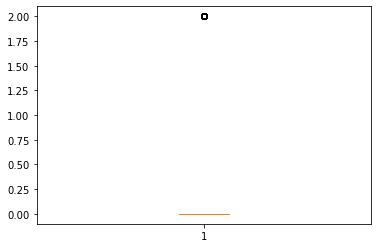

In [31]:
# check outlier in 'Informational' after preprocessing

plt.boxplot(dataset["Informational"])
plt.show()

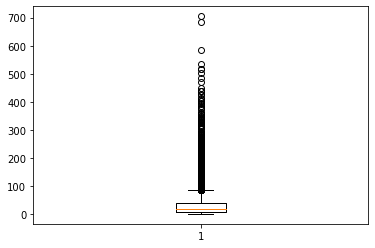

In [32]:
# check outlier in 'ProductRelated'

plt.boxplot(dataset["ProductRelated"])
plt.show()

In [33]:
# check outlier in 'ProductRelated'
dataset["ProductRelated"].skew()

4.341516415550065

In [34]:
# Handling outlier in 'ProductRelated' using Quantile-based Flooring and Capping

print(dataset['ProductRelated'].skew())
Q1=dataset['ProductRelated'].quantile(0.25)
Q3=dataset['ProductRelated'].quantile(0.75)
IQR=Q3-Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR
ten_percent=dataset['ProductRelated'].quantile(0.10)
ninty_percent=dataset['ProductRelated'].quantile(0.90)

dataset["ProductRelated"] = np.where(dataset["ProductRelated"] <Min, ten_percent,dataset['ProductRelated'])
dataset["ProductRelated"] = np.where(dataset["ProductRelated"] >Max, ninty_percent,dataset['ProductRelated'])
print(dataset['ProductRelated'].skew())

4.341516415550065
0.9819911437257264


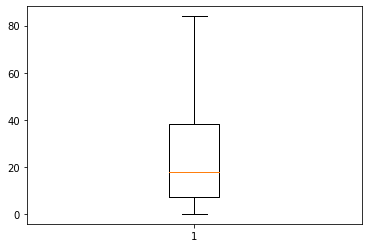

In [35]:
# check outlier in 'ProductRelated' after preprocessing
plt.boxplot(dataset["ProductRelated"])
plt.show()

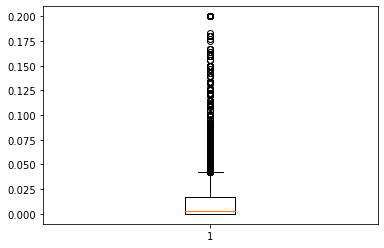

In [36]:
# check outlier in 'BounceRates'
plt.boxplot(dataset["BounceRates"])
plt.show()

In [37]:
# check outlier in 'BounceRates'
dataset["BounceRates"].skew()

2.947855266695535

In [38]:
# Handling outlier in 'BounceRates' using Quantile-based Flooring and Capping

print(dataset['BounceRates'].skew())
Q1=dataset['BounceRates'].quantile(0.25)
Q3=dataset['BounceRates'].quantile(0.75)
IQR=Q3-Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR
ten_percent=dataset['BounceRates'].quantile(0.10)
ninty_percent=dataset['BounceRates'].quantile(0.90)

dataset["BounceRates"] = np.where(dataset["BounceRates"] <Min, ten_percent,dataset['BounceRates'])
dataset["BounceRates"] = np.where(dataset["BounceRates"] >Max, ninty_percent,dataset['BounceRates'])
print(dataset['BounceRates'].skew())

2.947855266695535
1.524587165616581


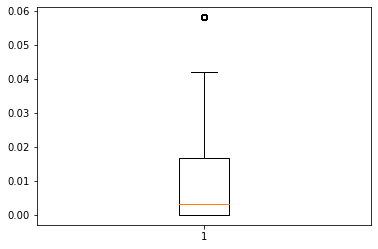

In [39]:
# check outlier in 'BounceRates' after preprocessing
plt.boxplot(dataset["BounceRates"])
plt.show()

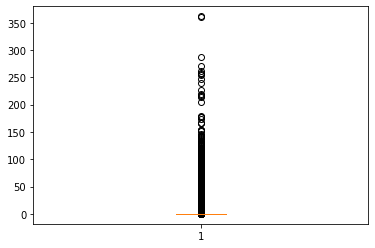

In [40]:
# check outlier in 'PageValues'
plt.boxplot(dataset["PageValues"])
plt.show()

In [41]:
# check outlier in 'PageValues'
dataset["PageValues"].skew()

6.382964248998133

In [42]:
# Handling outlier in 'PageValues' using Quantile-based Flooring and Capping

print(dataset['PageValues'].skew())
Q1=dataset['PageValues'].quantile(0.25)
Q3=dataset['PageValues'].quantile(0.75)
IQR=Q3-Q1
Min= Q1 - 1.5 * IQR
Max= Q3 + 1.5 * IQR
ten_percent=dataset['PageValues'].quantile(0.10)
ninty_percent=dataset['PageValues'].quantile(0.90)

dataset["PageValues"] = np.where(dataset["PageValues"] <Min, ten_percent,dataset['PageValues'])
dataset["PageValues"] = np.where(dataset["PageValues"] >Max, ninty_percent,dataset['PageValues'])
print(dataset['PageValues'].skew())

6.382964248998133
1.3421239795026065


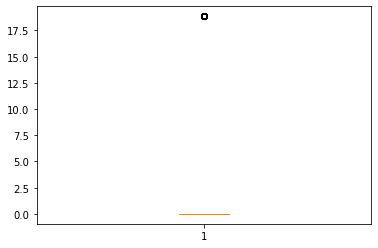

In [43]:
# check outlier in 'PageValues' after handling
plt.boxplot(dataset["PageValues"])
plt.show()

In [44]:
dataset.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Weekend,Visitor_New_Visitor,Visitor_Returning_Visitor,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.058197,0.0,0.0,0,0,1,0
1,0.0,0.0,0.0,0.0,2.0,0.000000,0.0,0.0,0,0,1,0
2,0.0,0.0,0.0,0.0,1.0,0.058197,0.0,0.0,0,0,1,0
3,0.0,0.0,0.0,0.0,2.0,0.058197,0.0,0.0,0,0,1,0
4,0.0,0.0,0.0,0.0,10.0,0.020000,0.0,0.0,1,0,1,0


In [45]:
dataset.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,BounceRates,PageValues,SpecialDay,Weekend,Visitor_New_Visitor,Visitor_Returning_Visitor,Revenue
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.100487,56.188294,0.426764,14.043796,25.855718,0.012962,4.174819,0.061427,0.232603,0.137388,0.855718,0.154745
std,2.702764,77.524924,0.819424,28.530529,23.318769,0.019404,7.829059,0.198917,0.422509,0.344271,0.351390,0.361676
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,0.003112,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,0.016813,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,10.000000,233.083333,2.000000,72.000000,84.000000,0.058197,18.855502,1.000000,1.000000,1.000000,1.000000,1.000000


## Save dataset after preprocessing

In [46]:
dataset.to_csv(r'D:\Faaclty\level 3\selcted-1\ANN Algorithm(numerical)\Dataset\preprocessed_online_shoping_intention.csv')

In [47]:
dataset.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'BounceRates', 'PageValues',
       'SpecialDay', 'Weekend', 'Visitor_New_Visitor',
       'Visitor_Returning_Visitor', 'Revenue'],
      dtype='object')